In [1]:
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/content/train_data.csv')
data

,no_of_cars,no_of_different_load,no_of_wheels,length,shape,num_loads,load_shape,class
0,5,4,2,long,openrect,3,rectanglod,east
1,4,3,2,short,ushaped,1,trianglod,east
2,4,2,2,short,openrect,1,circlelod,east
3,5,2,2,short,opentrap,1,trianglod,east
4,4,3,2,short,dblopnrect,1,trianglod,east
5,3,2,2,long,closedrect,3,circlelod,west
6,4,2,2,short,dblopnrect,1,circlelod,west
7,3,2,3,long,closedrect,1,rectanglod,west
8,5,2,2,short,opentrap,1,circlelod,west
9,3,1,2,short,ushaped,1,rectanglod,west


In [3]:
data.describe()

,no_of_cars,no_of_different_load,no_of_wheels,num_loads
count,10.000000,10.000000,10.000000,10.000000
mean,4.000000,2.300000,2.100000,1.400000
std,0.816497,0.823273,0.316228,0.843274
min,3.000000,1.000000,2.000000,1.000000
25%,3.250000,2.000000,2.000000,1.000000
50%,4.000000,2.000000,2.000000,1.000000
75%,4.750000,2.750000,2.000000,1.000000
max,5.000000,4.000000,3.000000,3.000000


In [4]:
data.isnull().sum()

no_of_cars              0
no_of_different_load    0
no_of_wheels            0
length                  0
shape                   0
num_loads               0
load_shape              0
class                   0
dtype: int64

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   no_of_cars            10 non-null     int64
 1   no_of_different_load  10 non-null     int64
 2   no_of_wheels          10 non-null     int64
 3   length                10 non-null     int64
 4   shape                 10 non-null     int64
 5   num_loads             10 non-null     int64
 6   load_shape            10 non-null     int64
 7   class                 10 non-null     int64
dtypes: int64(8)
memory usage: 768.0 bytes


**ENCODING**

In [5]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
data['length']=enc.fit_transform(data['length'])
data['shape']=enc.fit_transform(data['shape'])
data['load_shape']=enc.fit_transform(data['load_shape'])
data['class']=enc.fit_transform(data['class'])

In [6]:
X=data.iloc[:,:7]
y=data.iloc[:,7]

**FEATURE SELECTION**

In [7]:
from sklearn.decomposition import PCA
pca=PCA(n_components=4)
X_pca=pca.fit_transform(X)
X_pca

array([[ 0.3610902 ,  2.47816955, -0.72879751,  0.32388649],
       [-2.17969901,  0.58225728,  0.56616626,  0.56395807],
       [ 0.03353151, -0.68801062, -0.56808372, -0.51527267],
       [-1.54574316,  0.34624792,  0.50231934, -0.35690135],
       [ 0.46700139,  0.62049343,  1.40185918, -0.39596605],
       [ 2.73201448, -0.10550948, -0.72455741,  0.8975027 ],
       [ 0.91576498, -0.67526524, -0.28951941, -0.83524737],
       [ 2.06912151, -0.73823339,  1.13479361,  0.06983352],
       [-1.06427109, -0.24699647, -1.07705306, -0.86230749],
       [-1.7888108 , -1.57315299, -0.21712729,  1.11051415]])

**SPLITTING DATA**

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_pca,y,test_size=0.4,random_state=0)

**DECISION TREE MODEL**

In [9]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy')
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

[Text(0.5, 0.75, 'x[1] <= 0.12\nentropy = 1.0\nsamples = 6\nvalue = [3, 3]'), Text(0.25, 0.25, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'), Text(0.75, 0.25, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]')]


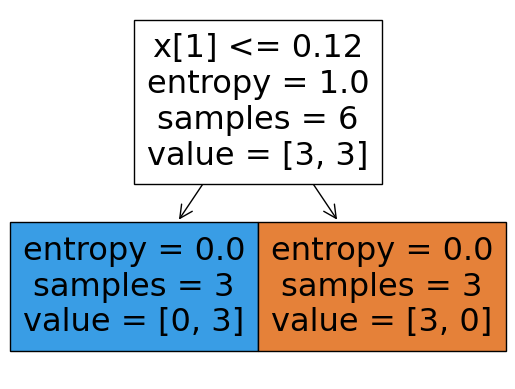

In [10]:
from sklearn import tree
print(tree.plot_tree(classifier,filled=True))

In [11]:
y_pred=classifier.predict(X_test)

0.75


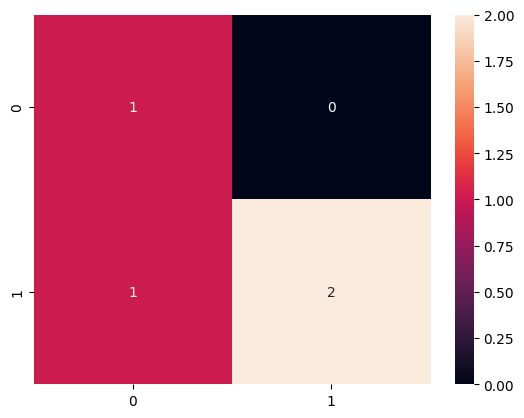

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
matrix=confusion_matrix(y_pred,y_test)
sns.heatmap(matrix,annot=True)
accuracy0=accuracy_score(y_pred,y_test)
print(accuracy0)

**CLASSIFICATION REPORT**

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.67      0.80         3

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4



**ROC AUC CURVE**

In [15]:
y_pred_proba = classifier.predict_proba(X_test)[::,1]

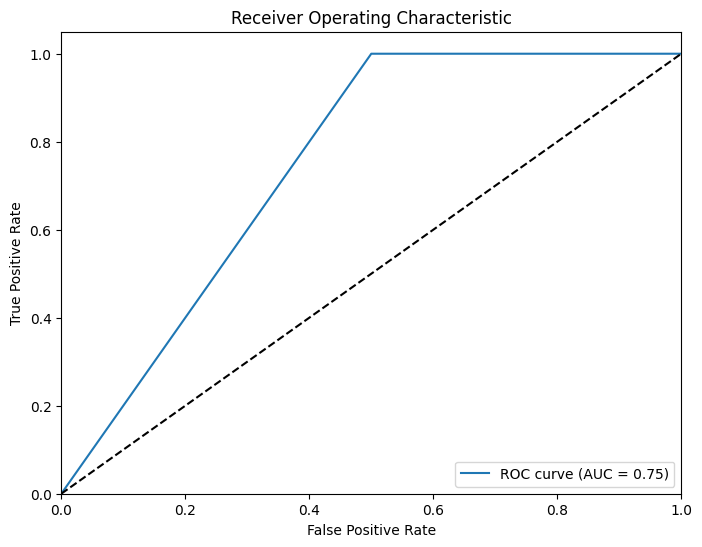

In [16]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show() 

In [17]:
from sklearn.linear_model import LogisticRegression
classifier1=LogisticRegression()
classifier1.fit(X_train,y_train)
y_pred1=classifier1.predict(X_test)

0.25


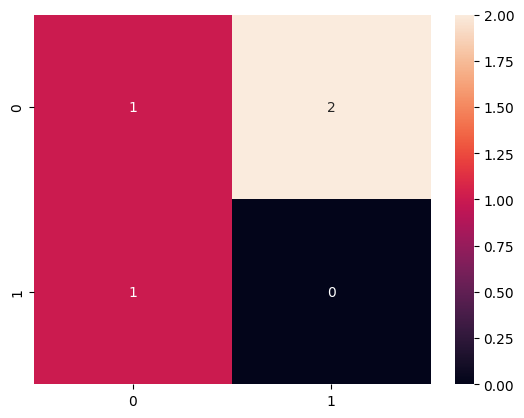

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
matrix=confusion_matrix(y_pred1,y_test)
sns.heatmap(matrix,annot=True)
accuracy1=accuracy_score(y_pred1,y_test)
print(accuracy1)

In [19]:
from sklearn.ensemble import RandomForestClassifier
classifier2=RandomForestClassifier(criterion='entropy')
classifier2.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy')

In [20]:
y_pred2=classifier2.predict(X_test)

0.75


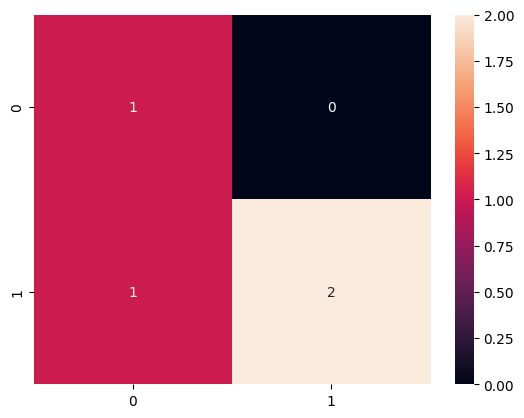

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
matrix=confusion_matrix(y_pred2,y_test)
sns.heatmap(matrix,annot=True)
accuracy2=accuracy_score(y_pred2,y_test)
print(accuracy2)

In [24]:
model={'Decision Tree':accuracy0,'Logistic Regression':accuracy1,'Random Forest':accuracy2}
result=pd.DataFrame(model,index=['Accuracy'])
result

,Decision Tree,Logistic Regression,Random Forest
Accuracy,0.75,0.25,0.75


<Axes: >

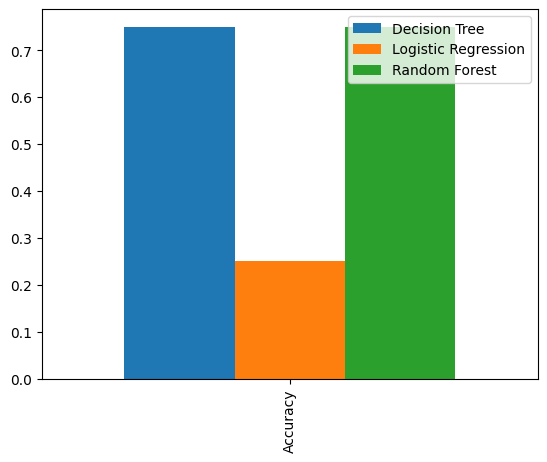

In [31]:
result.plot(kind='bar',width=1)